In [81]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [82]:
# archivo de dataset 

dataset = './dataset/fashion-mnist_train.csv'
data = np.loadtxt(dataset, skiprows=1, delimiter=',')

# Ingresar imágenes de dígitos de 30x30
input_layer_size  = 90

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
_labels = 10 

#  datos de entrenamiento almacenados en los arreglos X, y

X, y = data[:,1:], data[:,0].ravel()

print(y)
m = y.size
print(m)

[2. 9. 6. ... 8. 8. 7.]
60000


In [83]:
#Visualizacion de datos

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

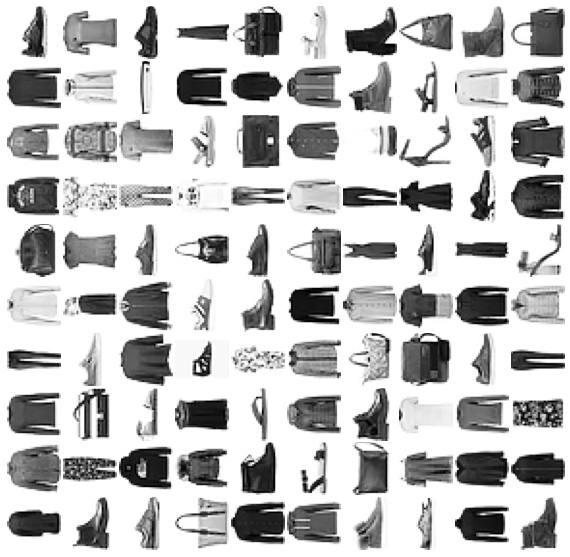

In [84]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [85]:
#Vectorización de regresión logística

# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)
# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])
# valores de testeo para el parametro de regularizacion
lambda_t = 3

In [86]:
#Vectorización de la funcion de costo

def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y 
    el gradiente del costo w.r.t. a los parámetros.
    
    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el ero de caracteristicas 
        incluida la intercepcion
        
    X : array_like
        Dataset con la forma(shape) (m x n). m es el ero de ejemplos, y n es el ero de 
        caracteristicas (incluida la intercepcion).
    
    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el ero de ejemplos
    
    lambda_ : float
        Parametro de regularización. 
    
    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada. 
    
    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la 
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size # cantidad de datos
    
    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    temp = theta
    temp[0] = 0
    
#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [87]:
#Vectorización regularizada de la regresión logística
print('teta',theta_t, '  x:',X_t,'  y:', y_t,'  lamda:',lambda_t)
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperado: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

teta [-2. -1.  1.  2.]   x: [[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]   y: [1 0 1 0 1]   lamda: 3
Costo         : 2.534819
Costo esperado: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [88]:
#Onve vs All

def oneVsAll(X, y, _labels, lambda_):
    """
    Trains _labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the ber of 
        data points, and n is the ber of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 
    
    y : array_like
        The data labels. A vector of shape (m, ).
    
    _labels : int
        ber of possible labels.
    
    lambda_ : float
        The logistic regularization parameter.
    
    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is ber of classes
        (ie. `labels`) and n is ber of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape
    # print('m:',m,',  n:',n)
    all_theta = np.zeros((_labels, n + 1))# crea una array de 0 de _labels elementos de n+1(+1 es por el tetha 0) de tamaño (10, 401)

    # Agrega unos a la matriz X -> 1,x
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    initial_theta = np.zeros(n + 1) # genera un vector de n+1(en este casp 401) de ceros
    # print('initia_theta',initial_theta)
    for c in np.arange(_labels):
        options = {'maxiter': 50} # para mejorar la precicion de tetha
        res = optimize.minimize(lrCostFunction, # funcion para el costo
                                initial_theta, # n+1 de ceros
                                (X, (y == c), lambda_), # devuelve valores de X donde y = c(0,1,2,3,4,5,6,7,8,9), lamba es el coeficiente de aprendizaje
                                jac=True, # usa el recurso del calculo computacional GPU
                                method='CG', # metodo de decenso por el gradiente mas optimizado
                                options=options) # optimiza, minimiza la funcion de costo, encontrar los valor de tetha que minimice
        
        all_theta[c] = res.x # devulve todas las tethas optimizadas

    return all_theta # [[..10]...400]

In [89]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, _labels, lambda_)
print(all_theta.shape)
print(all_theta[0])

C:\Users\Mad_o\AppData\Local\Temp\ipykernel_10604\576184740.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
C:\Users\Mad_o\AppData\Local\Temp\ipykernel_10604\576184740.py:56: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Mad_o\AppData\Local\Temp\ipykernel_10604\576184740.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
C:\Users\Mad_o\AppData\Local\Temp\ipykernel_10604\576184740.py:56: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Mad_o\AppData\Local\Temp\ipykernel_10604\576184740.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
C:\Users\Mad_o\AppData\Local\Temp\ipykernel_10604\576184740.py:56: RuntimeWarning: divide by zer

(10, 785)
[-5.94129839e-05 -1.20607197e-06  1.27571532e-06  1.42610564e-05
  4.43685170e-05 -2.07232409e-05 -4.84494502e-05 -2.27844425e-04
 -5.74339571e-04 -5.84771699e-04 -7.33622027e-04 -1.03102291e-03
  8.17266019e-04 -5.88555863e-04 -1.92565685e-03 -1.86513249e-03
 -1.82589743e-03  9.13019360e-04  5.82192330e-04 -4.16003756e-04
  4.95026370e-05  2.72008811e-04 -1.48754584e-04 -1.71273313e-04
 -1.30565782e-04  1.56323076e-05  4.92692872e-05 -8.83422869e-06
 -3.98736943e-07  9.19363976e-07  1.54926755e-06  4.78059323e-05
  1.43885409e-04  2.11773740e-05 -7.13464984e-04 -1.58075091e-03
 -9.29440011e-04 -4.56687094e-04 -1.02913399e-03 -4.04972396e-04
  4.91357913e-04 -6.28194077e-04 -5.27804204e-04 -2.05592035e-04
 -1.93638333e-04  5.80550048e-04  1.20437936e-03  3.79006776e-04
  4.57756529e-04  1.35934214e-03  4.42021410e-04  2.18571174e-04
 -6.38995614e-05 -2.73893164e-05  1.20556035e-04  3.61615142e-06
  1.75673296e-05  5.56055963e-07 -2.69309904e-05 -3.87684505e-05
  1.84117785e-0

In [90]:
#Prediccion One-vs-all
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas. 
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase. 
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1] 
    predice clases 0, 2, 0, 1 para 4 ejemplos).
    
    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is ber of classes
        and n is ber of features without the bias.
    
    X : array_like
        Data points to predict their labels. This is a matrix of shape 
        (m x n) where m is ber of data points to predict, and n is ber 
        of features without the bias term. Note we add the bias term for X in 
        this function. 
    
    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """
    
    m = X.shape[0];
    _labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(60000, 784)
Precision del conjuto de entrenamiento: 85.65%
(1, 784)
(1, 785)
[7]


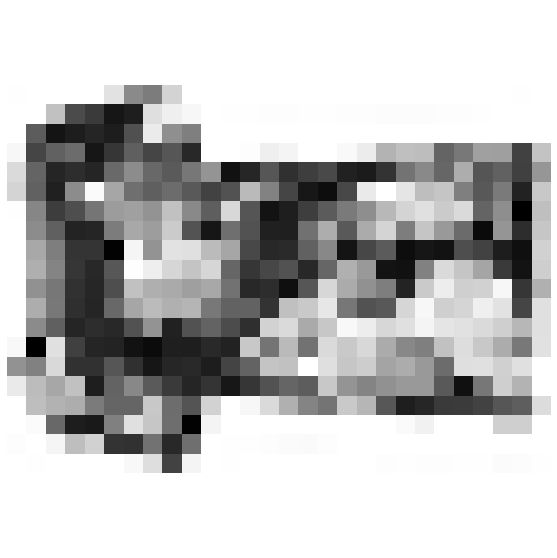

In [91]:

print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[3005:3006, :].copy()
print(XPrueba.shape)

XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

displayData(X[1002:1003, :])